<a href="https://colab.research.google.com/github/joaramirezra/Mineral-Border-Dectetion/blob/Documentation/Color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impacto del cambio de color en secciones delgadas
---

Agregar descripcion

---
#### Librerias

In [118]:
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import cv2
import requests
import io
from matplotlib import pyplot as plt

# Funciones
----


In [119]:
def print_images(*images):
  subplots = len(images)

  plt.figure(figsize=(15,5))
  for i,img in enumerate(images) :
    plt.subplot(1,subplots,(i+1))
    plt.imshow(img,interpolation='none')
  plt.grid(0)
  plt.show()

def img_color_channel_change(img):  
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # HSV hue-saturation-value
  img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  # HSL hue-saturation-lightness
  img_hsL = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
  # YCBCR
  img_YBR = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)
  
  return img_hsv,img_hsL,img_YBR,img_gray

def blurring_and_thresholding(img):
  kernel = np.ones((3,3),np.uint8)
  
  meanshift = cv2.pyrMeanShiftFiltering(img,sp=18,sr=50)
  
  laplacian = cv2.Laplacian(meanshift,ddepth = cv2.CV_64FC3, ksize=3 )
  laplacian = cv2.convertScaleAbs(laplacian)

  closing = cv2.morphologyEx(laplacian, cv2.MORPH_CLOSE, kernel)
  
  _, binary = cv2.threshold(closing,127,255,cv2.THRESH_BINARY)

  return meanshift,laplacian,binary

def countour_draw(img,Real):
  original = Real.copy()
  gray_scale =  cv2.cvtColor( img , cv2.COLOR_BGR2GRAY )
  cnts = cv2.findContours(gray_scale, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]

  for c in cnts:
    area = cv2.contourArea(c)
    if area > 50:
      cv2.drawContours(original,[c], 0, (250,0,0), 2)
    
  print_images(img, original)
  

# Cargar imagenes 

---
- descargar
- descomprimir


In [120]:
# !wget https://github.com/joaramirezra/Mineral-Border-Dectetion/raw/main/images/minerals.zip
# !ls

In [121]:
# !unzip minerals.zip
# !ls

# Proceso individual 

 - Cargar imagen 
 - Realizar cambio de color 
 - Suavizado y umbralizado
 - Dibujar Contornos

In [122]:
img = cv2.imread('type2/Muestra9.png')

# Cambio de color 

---


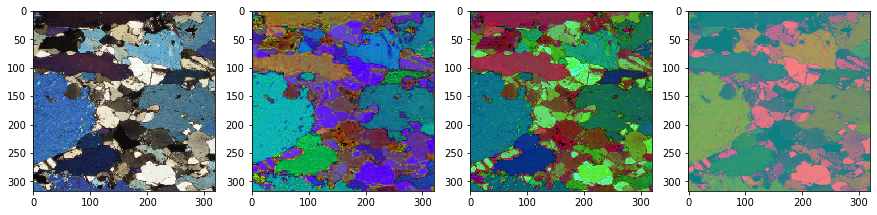

In [123]:
img_hsv,img_hsL,img_YBR,img_gray = img_color_channel_change(img)
print_images(img,img_hsv,img_hsL,img_YBR)

# Suaviizado y umbralizado

---

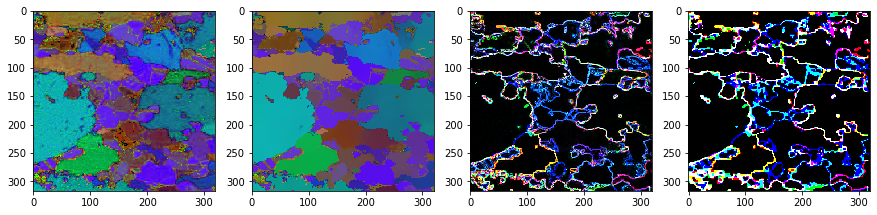

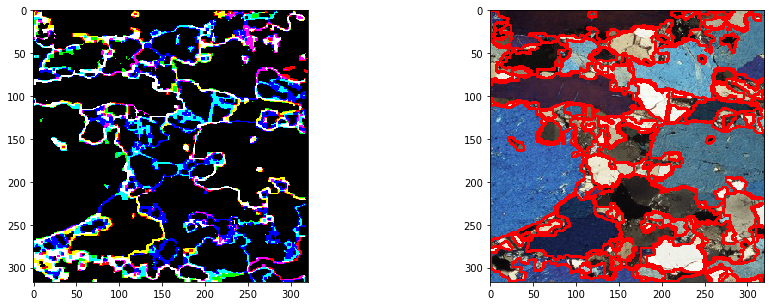

In [124]:
meanshift,laplacian,binary = blurring_and_thresholding(img_hsv)
print_images(img_hsv,meanshift,laplacian,binary)
countour_draw(binary,img)

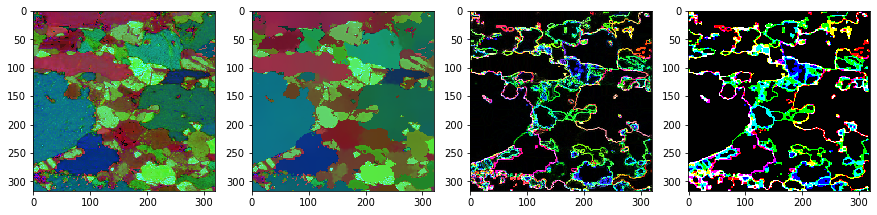

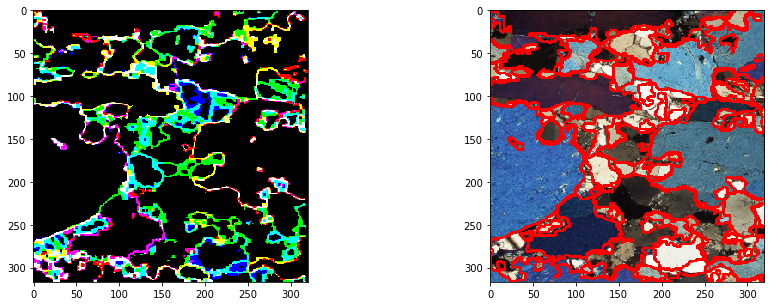

In [125]:
meanshift,laplacian,binary = blurring_and_thresholding(img_hsL)
print_images(img_hsL,meanshift,laplacian,binary)
countour_draw(binary,img)

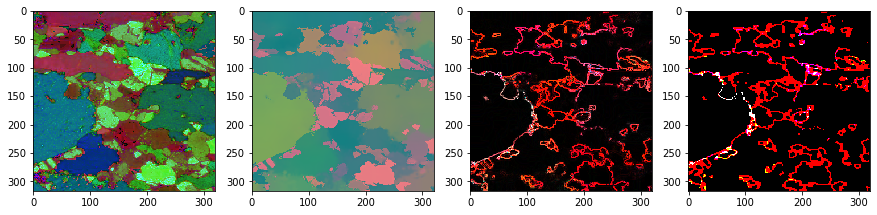

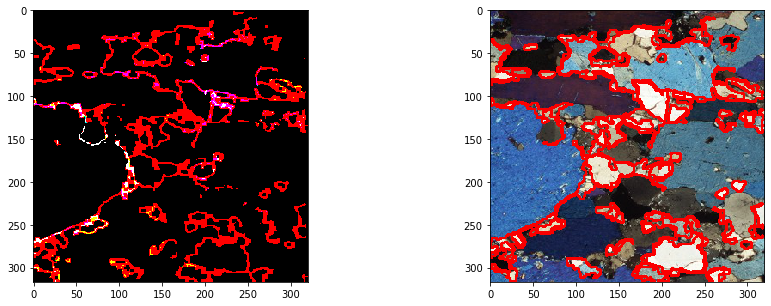

In [126]:
meanshift,laplacian,binary = blurring_and_thresholding(img_YBR)
print_images(img_hsL,meanshift,laplacian,binary)
countour_draw(binary,img)

# Automatico por typo 
---


In [ ]:
def automatico_por_typo(img):
  
meanshift,laplacian,binary = blurring_and_thresholding(img_YBR)
print_images(img_hsL,meanshift,laplacian,binary)
countour_draw(binary,img)